# Install packages

In [50]:
from google.colab import drive # import drive from google colab
drive.mount("/content/drive") 
!pip install neo
!pip install matplotlib_scalebar
!pip install ffmpeg
!pip install Ipython --upgrade
!pip3 install setuptools==65.5.0
%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%cd /content/drive/MyDrive/ff_repo/Multifirefly-Project

# Import packages

/Users/dusiyi/Documents/Multifirefly-Project


In [ ]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import os, sys
for p in [Path.cwd()] + list(Path.cwd().parents):
    if p.name == 'Multifirefly-Project':
        os.chdir(p)
        sys.path.insert(0, str(p / 'multiff_analysis/multiff_code/methods'))
        break

import sys


from data_wrangling import specific_utils, process_monkey_information, base_processing_class
from pattern_discovery import pattern_by_trials, pattern_by_points, make_ff_dataframe, ff_dataframe_utils, pattern_by_trials, pattern_by_points, cluster_analysis, organize_patterns_and_features, category_class
from decision_making_analysis.cluster_replacement import cluster_replacement_utils, plot_cluster_replacement
from decision_making_analysis.decision_making import decision_making_class, decision_making_utils, plot_decision_making, intended_targets_classes
from decision_making_analysis.GUAT import GUAT_helper_class, GUAT_collect_info_class, GUAT_combine_info_class, add_features_GUAT_and_TAFT
from decision_making_analysis import free_selection, replacement, trajectory_info, plotly_utils_polar
from visualization.matplotlib_tools import plot_trials, plot_polar, additional_plots, plot_behaviors_utils, plot_statistics
from visualization.animation import animation_func, animation_utils, animation_class
from null_behaviors import sample_null_distributions, show_null_trajectory
from machine_learning.ml_methods import hyperparam_tuning_class
from reinforcement_learning.base_classes import env_utils, base_env, more_envs, rl_base_class, rl_base_utils
from reinforcement_learning.agents.rnn import gru_utils, lstm_utils
from reinforcement_learning.agents.feedforward import interpret_neural_network, sb3_class, sb3_utils
from eye_position_analysis import eye_positions

from importlib import reload
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
from matplotlib import rc
from IPython.display import HTML
from matplotlib import animation
from functools import partial
from numpy import linalg as LA

plt.rcParams["animation.html"] = "html5"
os.environ['KMP_DUPLICATE_LIB_OK']='True'
rc('animation', html='jshtml')
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rcParams['animation.embed_limit'] = 2**128
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(suppress=True)
print("done")

done


# Retrieve individual monkey data

In [13]:
raw_data_folder_path = 'all_monkey_data/raw_monkey_data/monkey_Bruno/data_0326'
data_item = further_processing_class.FurtherProcessing(raw_data_folder_path=raw_data_folder_path)
data_item.retrieve_or_make_monkey_data()
data_item.make_or_retrieve_ff_dataframe(exists_ok=True)
data_item.find_patterns()
data_item.make_or_retrieve_all_trial_patterns(exists_ok=True)
data_item.make_or_retrieve_pattern_frequencies(exists_ok=True)
data_item.make_or_retrieve_all_trial_features(exists_ok=True)
data_item.make_or_retrieve_feature_statistics(exists_ok=True)
data_item.make_info_of_monkey()
# data_item.make_or_retrieve_target_closest()
# data_item.make_or_retrieve_target_angle_smallest()


# target_closest = data_item.target_closest
# target_angle_smallest = data_item.target_angle_smallest





monkey_information = data_item.monkey_information
ff_dataframe = data_item.ff_dataframe

ff_life_sorted = data_item.ff_life_sorted
ff_real_position_sorted = data_item.ff_real_position_sorted
ff_believed_position_sorted = data_item.ff_believed_position_sorted
cluster_around_target_indices = data_item.cluster_around_target_indices
ff_caught_T_new = data_item.ff_caught_T_new
ff_flash_sorted = data_item.ff_flash_sorted

all_trial_patterns = data_item.all_trial_patterns
all_trial_features = data_item.all_trial_features
pattern_frequencies = data_item.pattern_frequencies
feature_statistics = data_item.feature_statistics
info_of_monkey = data_item.info_of_monkey






Retrieved monkey_information


/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/eye_position_analysis/eye_positions.py:70: RuntimeWarning: invalid value encountered in sqrt
  gaze_mky_view_y = np.sqrt(numerator/denominator)


Retrieved monkey data
Retrieved ff_dataframe
Retrieved all_trial_patterns
Retrieved pattern_frequencies
Retrieved all_trial_features
Retrieved feature_statistics


# Calculate the ideal (not needed right now)

w/o inter-ocular distance

Re-write in latex

For left and right eye, I can just directly change body_x

Otherwise, just use the mean

In [ ]:
# hor_theta, ver_theta are ideal horizontal and vertical eye angles if perfectly tracking the target. 
# body_theta is the heading, gaze_world_r is the Euclidean distance between target and monkey position
'''
monkey_height = 10
hor_theta = np.arctan((gaze_world_x - body_x) / np.sqrt(monkey_height**2 + (gaze_world_y-body_y)**2)) - body_theta
ver_theta = np.arctan(monkey_height / gaze_world_r)


gaze_mky_view_x = gaze_world_x - body_x
gaze_mky_view_y = gaze_world_y - body_y
gaze_mky_view_r = np.sqrt(gaze_mky_view_x**2 + gaze_mky_view_y**2)
'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nmonkey_height = 10\nhor_theta = np.arctan((gaze_world_x - body_x) / np.sqrt(monkey_height**2 + (gaze_world_y-body_y)**2)) - body_theta\nver_theta = np.arctan(monkey_height / gaze_world_r)\n\n\ngaze_mky_view_x = gaze_world_x - body_x\ngaze_mky_view_y = gaze_world_y - body_y\ngaze_mky_view_r = np.sqrt(gaze_mky_view_x**2 + gaze_mky_view_y**2)\n'

w inter-ocular distance

In [14]:
interoculardist = 4 # Bruno
interoculardist = 3 # Schro, Quigley



To convert the time from monkey_information to signal_df, the ratio is about 1:13. I’ll just use the mid-interval points of each time interval in monkey_information[‘time’].

# Testing algorithm

I guess to test whether my algorithm of calculating gaze_world_x, gaze_world_y is correct is to have some simulated (gaze_world_x, gaze_world_y) and the calculated hor_theta, ver_theta respectively, and then see if my function can recover all the gaze_world_x, gaze_world_y.

In [15]:
monkey_height = -10

values = np.arange(-999, 999, 80)

gaze_world_x = np.repeat(values, len(values))
gaze_world_y = np.repeat(values.reshape([1, -1]), len(values), axis=0).reshape(-1)


body_theta = np.random.uniform(-pi, pi, len(gaze_world_x))
body_x = np.random.uniform(-1000, 1000, len(gaze_world_x))
body_y = np.random.uniform(-1000, 1000, len(gaze_world_x))


gaze_mky_view_x = gaze_world_x - body_x
gaze_mky_view_y = gaze_world_y - body_y
gaze_mky_view_xy = np.stack((gaze_mky_view_x, gaze_mky_view_y), axis=1)
gaze_mky_view_r = np.linalg.norm(gaze_mky_view_xy, axis=1)

theta_to_north = np.arctan((gaze_world_x - body_x) / np.sqrt(monkey_height**2 + (gaze_world_y-body_y)**2))
to_adjust = np.where(gaze_mky_view_y < 0)[0]
theta_to_north[to_adjust] = np.sign(theta_to_north[to_adjust]) * (pi - np.abs(theta_to_north[to_adjust]))


hor_theta = theta_to_north - body_theta
ver_theta = np.arctan(monkey_height / gaze_mky_view_r)


gaze_mky_view_x_recovered, gaze_mky_view_y_recovered, _, gaze_world_x_recovered, gaze_world_y_recovered = eye_positions.apply_formulas_to_convert_eye_position_to_ff_position(hor_theta, ver_theta, body_theta, monkey_height, body_x, body_y,
                                                                                                                                                                                 interocular_dist=0)

In [16]:
plt.scatter(gaze_world_x, gaze_world_x_recovered)
plt.show()

In [17]:
plt.scatter(gaze_world_y, gaze_world_y_recovered)
plt.show()

# plot it (overhead)

In [ ]:
caught_ff_num = len(ff_caught_T_new)

cluster_around_target_trials, _, cluster_around_target_indices, cluster_around_target_positions = pattern_by_trials.cluster_around_target_func(ff_dataframe, caught_ff_num, ff_caught_T_new, ff_real_position_sorted)


PLAYER = 'monkey'

trial_total_num = 10
PlotTrials_args = (monkey_information, ff_dataframe, ff_life_sorted, ff_real_position_sorted, ff_believed_position_sorted, cluster_around_target_indices, ff_caught_T_new)
PlotTrials_kwargs = {'player': PLAYER,
                     'images_dir': None} 

classic_plot_kwargs = {'show_stops': True,
                       'show_believed_target_positions': True,
                       'show_reward_boundary': True,
                       'show_scale_bar': True}

combined_plot_kwargs = {'combined_plot': True,
                        'show_alive_fireflies': False,
                        'show_title': False,
                        'show_start': False}

In [26]:
from importlib import reload
reload(plot_trials)
category = cluster_around_target_trials
trial_total_num = 2

num_trials = 2

if len(category) > 0:
  with general_utils.initiate_plot(10, 10, 100):
      for currentTrial in category[:trial_total_num]:
          duration = [ff_caught_T_new[currentTrial-num_trials], ff_caught_T_new[currentTrial]]
      # for start_time in range(2000, 2050, 3):
      #     duration = [start_time, start_time+3]

          returned_info = plot_trials.PlotTrials(duration, 
                      *PlotTrials_args,
                      **classic_plot_kwargs,                                  
                      show_connect_path_ff_except_targets = True,
                      show_path_when_target_visible = False,
                      zoom_in = False,
                      adjust_xy_limits = True,
                      show_eye_positions = True,
                      show_eye_positions_on_the_right = True,
                      show_colorbar = True,
                      show_connect_path_eye_positions = True,
                      show_eye_world_speed_vs_monkey_speed = True,
                      )

          plt.tight_layout()
          plt.show()
          
          

currentTrial: 6 num_trials: 2


<Figure size 1000x1000 with 0 Axes>

currentTrial: 16 num_trials: 1


<Figure size 1000x1000 with 0 Axes>

# Animation

In [ ]:
stop!

### prepare for animation

In [ ]:
currentTrial = 250
num_trials = 3
k = 3
fig, ax = plt.subplots()
num_frames, anim_monkey_info, flash_on_ff_dict, alive_ff_dict, believed_ff_dict, new_num_trials, ff_dataframe_anim\
            = animation_utils.prepare_for_animation(ff_dataframe, ff_caught_T_new, ff_life_sorted, ff_believed_position_sorted, \
            ff_real_position_sorted, ff_flash_sorted, monkey_information, k=k, currentTrial=currentTrial, num_trials=num_trials)
print("Number of frames is:", num_frames)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of frames is: 76


### make animation

In [ ]:
animate_func = partial(animation_func.animate, ax=ax, anim_monkey_info=anim_monkey_info, ff_dataframe_anim=ff_dataframe_anim, ff_real_position_sorted=ff_real_position_sorted, \
                       flash_on_ff_dict=flash_on_ff_dict, alive_ff_dict=alive_ff_dict, believed_ff_dict=believed_ff_dict, margin = 400,
                       plot_eye_position=True, set_xy_limits=True)
anim = animation.FuncAnimation(fig, animate_func, frames=num_frames, interval=100, repeat=True) 
HTML(anim.to_html5_video())

# writervideo = animation.FFMpegWriter(c=int(62/k)) #the real life speed, since dt = 0.25
# anim.save(f"agent_animation_{currentTrial-num_trials+1}_{currentTrial}.mp4", writer=writervideo)


# How far can the monkey see?

In [ ]:
gaze_r = np.linalg.norm(monkey_information[['gaze_mky_view_x', 'gaze_mky_view_y']], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
fig, axes=plt.subplots(figsize=(10,7))
sns.histplot(gaze_r, binrange=(0, 2000))
plt.title('How far can the monkey see?')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# See what percentage of gaze positions are valid
valid_gaze_r = gaze_r[(gaze_r < 2000) & (gaze_r >= 0)]
len(valid_gaze_r)/len(gaze_r)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7173723087552453

In [ ]:
# Among valid positions, see what percentage falls below 500
len(np.where(valid_gaze_r<400)[0])/len(valid_gaze_r)

0.9439624953083727

# Compare left and right eye

## in smr

In [35]:
raw_data_folder_path = "all_monkey_data/raw_monkey_data/monkey_Bruno/data_0330"
channel_signal_output, marker_list, smr_sampling_rate = retrieve_raw_data.extract_smr_data(raw_data_folder_path)
# Considering the first smr file, use marker_list[0], channel_signal_output[0]
juice_timestamp = marker_list[0]['values'][marker_list[0]['labels'] == 4]
channel_signal_smr = channel_signal_output[0]

In [40]:
def get_subset_of_both_df(start_time, channel_signal_smr, monkey_information):
    time = np.arange(start_time, start_time+1, 0.1)
    smr_index = np.searchsorted(channel_signal_smr['Time'].values, time)
    smr_subset = channel_signal_smr.iloc[smr_index[0]:smr_index[-1]]
    info_index = np.searchsorted(monkey_information['time'].values, time)
    info_subset = monkey_information.iloc[info_index[0]:info_index[-1]]
    return smr_subset, info_subset

def compare_left_and_right_in_smr(channel_signal_smr, monkey_information, direction='y', all_start_time = range(1000, 1300, 100)):
    for start_time in all_start_time:
        plt.figure(figsize=(7, 7))
        smr_subset, info_subset = get_subset_of_both_df(start_time, channel_signal_smr, monkey_information)
        plt.scatter(smr_subset['Time'], smr_subset['LD'+direction], s=2, alpha=0.5)
        plt.scatter(smr_subset['Time'], smr_subset['RD'+direction], s=2, alpha=0.5)
        plt.xlabel('Time (s)')
        plt.ylabel(direction)
        plt.legend(['left', 'right'])
        plt.show()    

In [ ]:
compare_left_and_right_in_smr(channel_signal_smr, monkey_information, 'y')

In [ ]:
compare_left_and_right_in_smr(channel_signal_smr, monkey_information, 'z')

## in monkey_information

In [94]:

def get_subset_of_monkey_information(start_time, monkey_information):
    time = np.arange(start_time, start_time+1, 0.1)
    info_index = np.searchsorted(monkey_information['time'].values, time)
    info_subset = monkey_information.iloc[info_index[0]:info_index[-1]]
    return info_subset


monkey_information['angle_y_l'] = monkey_information['LDy']
monkey_information['angle_y_r'] = monkey_information['RDy']
monkey_information['angle_z_l'] = monkey_information['LDz']
monkey_information['angle_z_r'] = monkey_information['RDz']

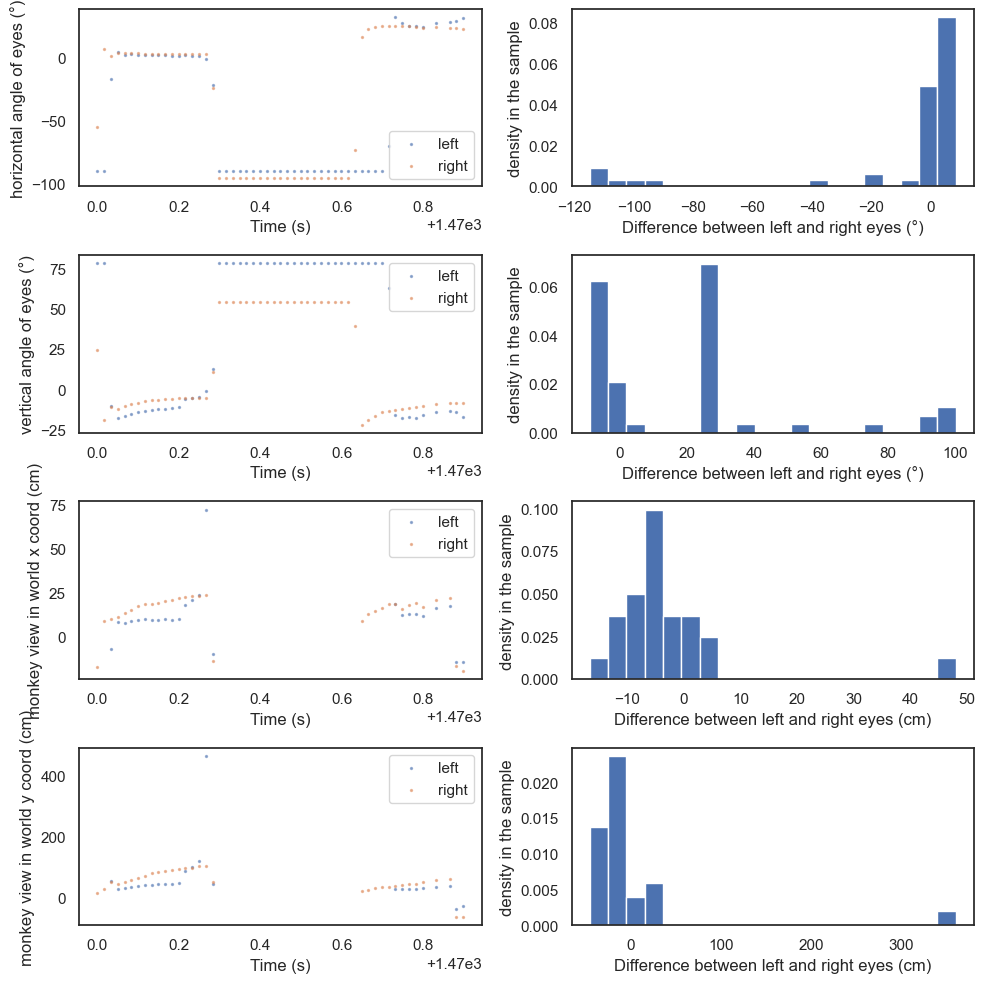

In [101]:
# make 4 subplots

units = {'gaze_mky_view_x': 'cm',
            'gaze_mky_view_y': 'cm',
            'angle_y': u'\N{DEGREE SIGN}',
            'angle_z': u'\N{DEGREE SIGN}'}

names = {'gaze_mky_view_x': 'monkey view in world x coord',
            'gaze_mky_view_y': 'monkey view in world y coord',
            'angle_y': 'horizontal angle of eyes',
            'angle_z': 'vertical angle of eyes'}

for start_time in range(970, 1500, 100):
    info_subset = get_subset_of_monkey_information(start_time, monkey_information)
    fig, axes = plt.subplots(4, 2, figsize=(10, 10))
    axes = axes.flatten()
    for i, feature in enumerate(['angle_y', 'angle_z', 'gaze_mky_view_x', 'gaze_mky_view_y']):
        axes[2*i].scatter(info_subset['time'], info_subset[feature+'_l'], s=2, alpha=0.5)
        axes[2*i].scatter(info_subset['time'], info_subset[feature+'_r'], s=2, alpha=0.5)
        axes[2*i].set_xlabel('Time (s)')
        axes[2*i].set_ylabel(names[feature] + ' (' + units[feature] + ')')
        axes[2*i].legend(['left', 'right'])

        axes[2*i+1].hist(info_subset[feature+'_l']-info_subset[feature+'_r'], density=True, bins=20)
        axes[2*i+1].set_xlabel('Difference between left and right eyes' + ' (' + units[feature] + ')')
        axes[2*i+1].set_ylabel('density in the sample')
    # make the plots tight
    fig.tight_layout()


# Average first

In [102]:
reload(eye_positions)
monkey_information = eye_positions.average_and_then_convert_eye_positions_in_monkey_information(monkey_information)

/Users/dusiyi/Documents/Multifirefly-Project/multiff_analysis/multiff_code/methods/eye_position_analysis/eye_positions.py:106: RuntimeWarning: invalid value encountered in sqrt
  gaze_world_r = np.linalg.norm(gaze_world_xy, axis=1)


## average in angle vs in coord

In [108]:
ff_dataframe['ff_distance'].shift(1)

0              NaN
1        113.07325
2        112.84776
3        112.74298
4        112.19933
            ...   
779315   211.05071
779316   214.03951
779317   216.90275
779318   219.36873
779319   222.33898
Name: ff_distance, Length: 779320, dtype: float64

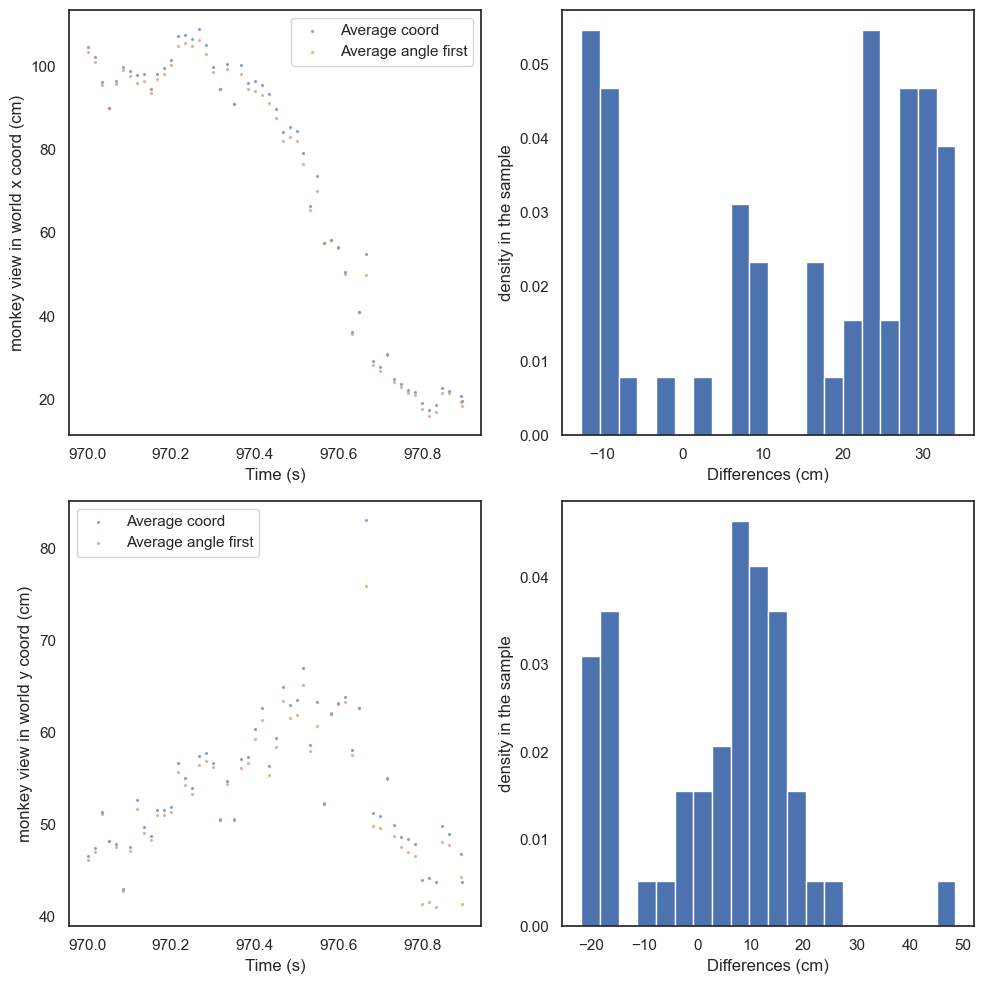

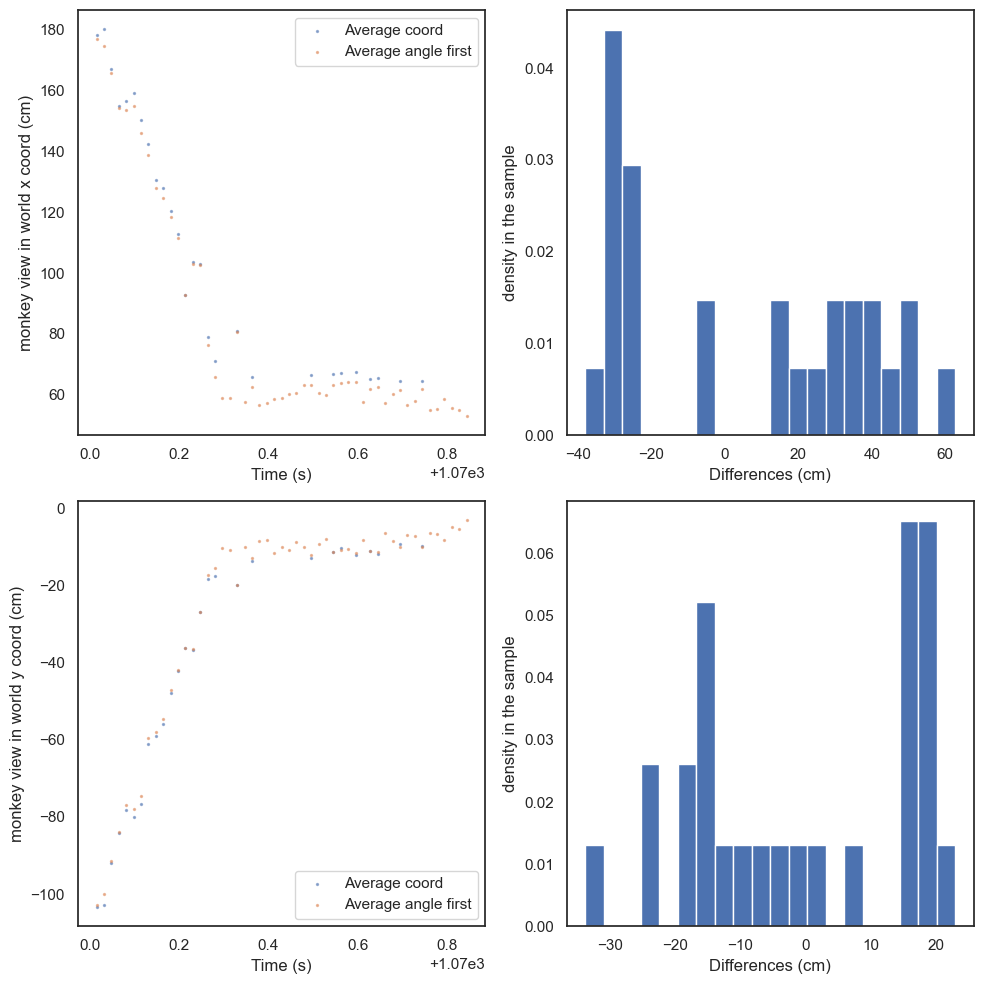

In [105]:

units = {'gaze_mky_view_x': 'cm',
            'gaze_mky_view_y': 'cm',
            'angle_y': u'\N{DEGREE SIGN}',
            'angle_z': u'\N{DEGREE SIGN}'}

names = {'gaze_mky_view_x': 'monkey view in world x coord',
            'gaze_mky_view_y': 'monkey view in world y coord',
            'angle_y': 'horizontal angle of eyes',
            'angle_z': 'vertical angle of eyes'}

for start_time in range(970, 1500, 100):
    info_subset = get_subset_of_monkey_information(start_time, monkey_information)
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.flatten()
    for i, feature in enumerate(['gaze_mky_view_x', 'gaze_mky_view_y']):
        axes[2*i].scatter(info_subset['time'], info_subset[feature], s=2, alpha=0.5)
        axes[2*i].scatter(info_subset['time'], info_subset[feature+'_avg'], s=2, alpha=0.5)
        axes[2*i].set_xlabel('Time (s)')
        axes[2*i].set_ylabel(names[feature] + ' (' + units[feature] + ')')
        axes[2*i].legend(['Average coord', 'Average angle first'])

        axes[2*i+1].hist(info_subset[feature+'_l']-info_subset[feature+'_r'], density=True, bins=20)
        axes[2*i+1].set_xlabel('Differences' + ' (' + units[feature] + ')')
        axes[2*i+1].set_ylabel('density in the sample')
    # make the plots tight
    fig.tight_layout()

## average first

# Debug

In [ ]:
!pip install -Uqq ipdb
import ipdb
%pdb on

Automatic pdb calling has been turned ON
